In [60]:
import pandas as pd
from collections import Counter
from matplotlib import pyplot as plt

In [61]:
df = pd.read_csv("log_regression.csv")

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   samples               102 non-null    object 
 1   accuracy(ave_F1)      102 non-null    float64
 2   ave_precision         102 non-null    float64
 3   ave_recall            102 non-null    float64
 4   authentic_mislabeled  102 non-null    object 
 5   synthetic_mislabeled  102 non-null    object 
 6   top_10_features       102 non-null    object 
 7   top_10_pos_features   102 non-null    object 
 8   top_10_neg_features   102 non-null    object 
dtypes: float64(3), object(6)
memory usage: 7.3+ KB


In [63]:
df.head()

,samples,accuracy(ave_F1),ave_precision,ave_recall,authentic_mislabeled,synthetic_mislabeled,top_10_features,top_10_pos_features,top_10_neg_features
0,"['ALCOTT_synthetic_combined_34.txt', 'ALCOTT_s...",0.829459,0.832166,0.830,"['Griggs_131.txt', 'Chesnutt_273.txt', 'Austen...","['ALCOTT_synthetic_combined_155.txt', 'AUSTEN_...","{'the': 5.5614976701593335, 'of': 4.4376037893...","{'the': 5.5614976701593335, 'of': 4.4376037893...","{'to': -2.3174725017573636, 'i': -1.9932841112..."
1,"['ALCOTT_synthetic_combined_131.txt', 'ALCOTT_...",0.843763,0.844857,0.844,"['Hopkins_81.txt', 'Twain_2573.txt', 'Austen_1...","['ALCOTT_synthetic_combined_61.txt', 'TWAIN_sy...","{'the': -5.577708606864234, 'of': -4.685133375...","{'to': 2.503877735269993, 'i': 2.0104201259329...","{'the': -5.577708606864234, 'of': -4.685133375..."
2,"['ALCOTT_synthetic_combined_3.txt', 'ALCOTT_sy...",0.845481,0.851125,0.846,"['Austen_378.txt', 'Gaskell_784.txt', 'Twain_2...","['GASKELL_synthetic_combined_38.txt', 'TWAIN_s...","{'the': -5.676925524988008, 'of': -4.458028700...","{'to': 2.1778773513249727, 'i': 1.961072112192...","{'the': -5.676925524988008, 'of': -4.458028700..."
3,"['ALCOTT_synthetic_combined_14.txt', 'ALCOTT_s...",0.838497,0.842405,0.839,"['Chesnutt_623.txt', 'Austen_303.txt', 'Twain_...","['ALCOTT_synthetic_combined_27.txt', 'TWAIN_sy...","{'the': -6.085281571703581, 'of': -4.713575793...","{'to': 2.4497031836766574, 'i': 2.246429410457...","{'the': -6.085281571703581, 'of': -4.713575793..."
4,"['ALCOTT_synthetic_combined_161.txt', 'ALCOTT_...",0.837061,0.844983,0.838,"['Chesnutt_542.txt', 'Gaskell_1024.txt', 'Stok...","['AUSTEN_synthetic_combined_58.txt', 'ALCOTT_s...","{'the': -5.6258197944656585, 'of': -4.44347888...","{'to': 2.3633971156020457, 'i': 1.975476394773...","{'the': -5.6258197944656585, 'of': -4.44347888..."


In [64]:
df = df.sort_values("accuracy(ave_F1)", ascending=False)
df.head(10)

,samples,accuracy(ave_F1),ave_precision,ave_recall,authentic_mislabeled,synthetic_mislabeled,top_10_features,top_10_pos_features,top_10_neg_features
97,"['ALCOTT_synthetic_combined_62.txt', 'ALCOTT_s...",0.889551,0.893988,0.890,"['Bronte_1505.txt', 'Gaskell_116.txt', 'Hopkin...","['AUSTEN_synthetic_combined_24.txt', 'BRONTE_s...","{'the': 6.177742119562733, 'of': 4.79093834307...","{'the': 6.177742119562733, 'of': 4.79093834307...","{'to': -2.6065913430564356, 'i': -2.2194912241..."
5,"['ALCOTT_synthetic_combined_139.txt', 'ALCOTT_...",0.888737,0.893900,0.889,"['Griggs_393.txt', 'Twain_385.txt', 'Alcott_56...","['AUSTEN_synthetic_combined_3.txt', 'AUSTEN_sy...","{'the': -6.035431236729109, 'of': -4.754835959...","{'to': 2.596002921020653, 'i': 1.9961913152082...","{'the': -6.035431236729109, 'of': -4.754835959..."
37,"['ALCOTT_synthetic_combined_54.txt', 'ALCOTT_s...",0.883588,0.888018,0.884,"['Gaskell_1901.txt', 'Gaskell_1320.txt', 'Aust...","['TWAIN_synthetic_combined_14.txt', 'TWAIN_syn...","{'the': -6.15607723234362, 'of': -4.9273840069...","{'to': 2.5172121832325693, 'i': 2.176957985843...","{'the': -6.15607723234362, 'of': -4.9273840069..."
80,"['ALCOTT_synthetic_combined_70.txt', 'ALCOTT_s...",0.881550,0.891442,0.882,"['Stoker_488.txt', 'Dickens_7513.txt', 'Chesnu...","['AUSTEN_synthetic_combined_80.txt', 'GASKELL_...","{'the': -6.089096112542344, 'of': -4.748739052...","{'to': 2.481289683643397, 'i': 1.9251554742852...","{'the': -6.089096112542344, 'of': -4.748739052..."
33,"['ALCOTT_synthetic_combined_14.txt', 'ALCOTT_s...",0.881452,0.889696,0.882,"['Gaskell_1027.txt', 'Chesnutt_175.txt', 'Aust...","['BRONTE_synthetic_combined_102.txt', 'BRONTE_...","{'the': 5.820754067069908, 'of': 4.40819266594...","{'the': 5.820754067069908, 'of': 4.40819266594...","{'to': -2.3285204203750576, 'i': -1.9751954570..."
20,"['ALCOTT_synthetic_combined_124.txt', 'ALCOTT_...",0.879698,0.881961,0.880,"['Griggs_321.txt', 'Alcott_241.txt', 'Twain_28...","['AUSTEN_synthetic_combined_65.txt', 'TWAIN_sy...","{'the': -6.094616113963886, 'of': -4.622466052...","{'to': 2.5696973881788736, 'i': 2.031245859418...","{'the': -6.094616113963886, 'of': -4.622466052..."
8,"['ALCOTT_synthetic_combined_123.txt', 'ALCOTT_...",0.877590,0.882362,0.878,"['Dickens_5714.txt', 'Austen_668.txt', 'Chesnu...","['AUSTEN_synthetic_combined_166.txt', 'ALCOTT_...","{'the': -5.889182292139095, 'of': -4.970485528...","{'to': 2.6518716803011584, 'i': 2.359671865672...","{'the': -5.889182292139095, 'of': -4.970485528..."
84,"['ALCOTT_synthetic_combined_108.txt', 'ALCOTT_...",0.876928,0.877153,0.877,"['Alcott_2544.txt', 'Gaskell_336.txt', 'Gaskel...","['TWAIN_synthetic_combined_35.txt', 'GRIGGS_sy...","{'the': -5.4401313214180895, 'of': -4.46170899...","{'to': 2.3955885837288258, 'i': 2.166221586519...","{'the': -5.4401313214180895, 'of': -4.46170899..."
68,"['ALCOTT_synthetic_combined_4.txt', 'ALCOTT_sy...",0.876635,0.883310,0.877,"['Chesnutt_633.txt', 'Griggs_5.txt', 'Griggs_3...","['ALCOTT_synthetic_combined_4.txt', 'ALCOTT_sy...","{'the': -5.828100617933456, 'of': -4.442729545...","{'to': 2.3172282379474693, 'i': 2.055035146136...","{'the': -5.828100617933456, 'of': -4.442729545..."
28,"['ALCOTT_synthetic_combined_171.txt', 'ALCOTT_...",0.872727,0.875130,0.873,"['Chesnutt_442.txt', 'Hopkins_111.txt', 'Alcot...","['AUSTEN_synthetic_combined_77.txt', 'BRONTE_s...","{'the': -5.977020488627015, 'of': -4.818659799...","{'to': 2.531914373646414, 'i': 2.2259867910651...","{'the': -5.977020488627015, 'of': -4.818659799..."


In [65]:
df_sorted = df.sort_values("accuracy(ave_F1)", ascending=False).reset_index()
df_sorted.head()

,index,samples,accuracy(ave_F1),ave_precision,ave_recall,authentic_mislabeled,synthetic_mislabeled,top_10_features,top_10_pos_features,top_10_neg_features
0,97,"['ALCOTT_synthetic_combined_62.txt', 'ALCOTT_s...",0.889551,0.893988,0.890,"['Bronte_1505.txt', 'Gaskell_116.txt', 'Hopkin...","['AUSTEN_synthetic_combined_24.txt', 'BRONTE_s...","{'the': 6.177742119562733, 'of': 4.79093834307...","{'the': 6.177742119562733, 'of': 4.79093834307...","{'to': -2.6065913430564356, 'i': -2.2194912241..."
1,5,"['ALCOTT_synthetic_combined_139.txt', 'ALCOTT_...",0.888737,0.893900,0.889,"['Griggs_393.txt', 'Twain_385.txt', 'Alcott_56...","['AUSTEN_synthetic_combined_3.txt', 'AUSTEN_sy...","{'the': -6.035431236729109, 'of': -4.754835959...","{'to': 2.596002921020653, 'i': 1.9961913152082...","{'the': -6.035431236729109, 'of': -4.754835959..."
2,37,"['ALCOTT_synthetic_combined_54.txt', 'ALCOTT_s...",0.883588,0.888018,0.884,"['Gaskell_1901.txt', 'Gaskell_1320.txt', 'Aust...","['TWAIN_synthetic_combined_14.txt', 'TWAIN_syn...","{'the': -6.15607723234362, 'of': -4.9273840069...","{'to': 2.5172121832325693, 'i': 2.176957985843...","{'the': -6.15607723234362, 'of': -4.9273840069..."
3,80,"['ALCOTT_synthetic_combined_70.txt', 'ALCOTT_s...",0.881550,0.891442,0.882,"['Stoker_488.txt', 'Dickens_7513.txt', 'Chesnu...","['AUSTEN_synthetic_combined_80.txt', 'GASKELL_...","{'the': -6.089096112542344, 'of': -4.748739052...","{'to': 2.481289683643397, 'i': 1.9251554742852...","{'the': -6.089096112542344, 'of': -4.748739052..."
4,33,"['ALCOTT_synthetic_combined_14.txt', 'ALCOTT_s...",0.881452,0.889696,0.882,"['Gaskell_1027.txt', 'Chesnutt_175.txt', 'Aust...","['BRONTE_synthetic_combined_102.txt', 'BRONTE_...","{'the': 5.820754067069908, 'of': 4.40819266594...","{'the': 5.820754067069908, 'of': 4.40819266594...","{'to': -2.3285204203750576, 'i': -1.9751954570..."


In [85]:
from statistics import mean 
accuracy_values = (df['accuracy(ave_F1)']).tolist()
print("Mean accuracy for regression: " + str(mean(accuracy_values)))
print("Max accuracy for regression: " + str(max(accuracy_values)))


Mean accuracy for regression: 0.8517307947694642
Max accuracy for regression: 0.8895511089468325


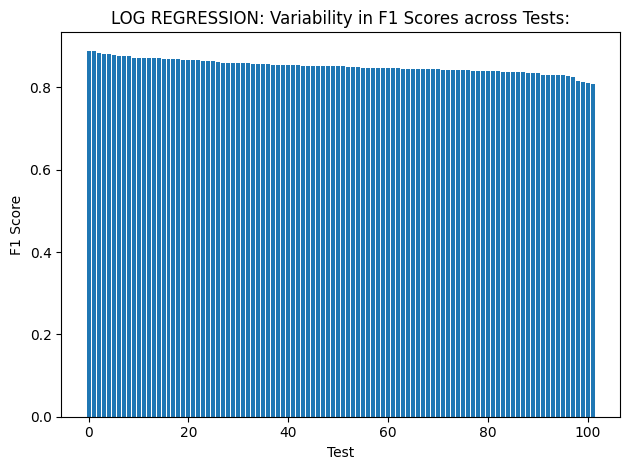

In [67]:
plt.figure()  # Adjust the figure size if necessary
plt.bar(df_sorted.index.values, df_sorted['accuracy(ave_F1)'])

# Step 2: Labeling the graph
plt.xlabel('Test')
plt.ylabel('F1 Score')
plt.title('LOG REGRESSION: Variability in F1 Scores across Tests:')

# Step 3: Show the plot
plt.tight_layout()
plt.show()

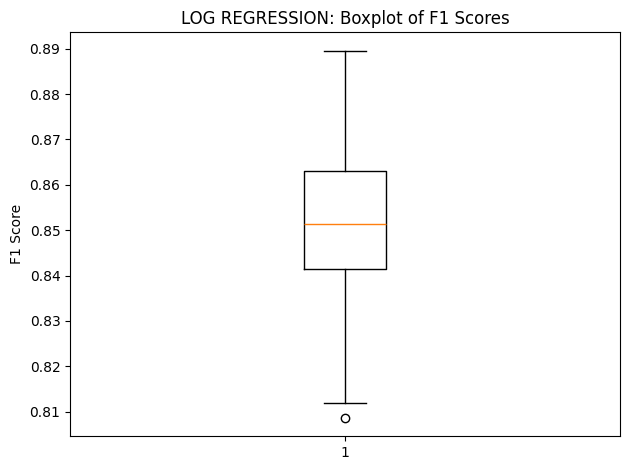

In [68]:
plt.figure()  # Optional: Adjust figure size if necessary
plt.boxplot(df['accuracy(ave_F1)'])

# Step 2: Label the graph
plt.ylabel('F1 Score')
plt.title('LOG REGRESSION: Boxplot of F1 Scores')

# Step 3: Show the plot
plt.tight_layout()
plt.show()

In [69]:
authentic = df['authentic_mislabeled'].tolist()

authentic_mislabeled = []

import ast

# Iterate over each string in the list
for item in authentic:
    # Convert the string representation of the list into an actual list using ast.literal_eval
    sublist = ast.literal_eval(item)
    # Extend the flat_list with elements from the sublist
    authentic_mislabeled.extend(sublist)

author_mislabeled = []

for x in authentic_mislabeled:
    name = x.split("_")[0]
    author_mislabeled.append(name.lower())



string_counts = Counter(author_mislabeled)

# Create a DataFrame from the Counter dictionary
auth_df = pd.DataFrame(list(string_counts.items()), columns=['author', 'Count'])
auth_df = auth_df.sort_values("Count", ascending=False)

print("Number of times an authentic chunk by an author was labelled synthetic out of 200,000 samples (100 samples by 100 runs):")

auth_df.head(10)

Number of times an authentic chunk by an author was labelled synthetic out of 200,000 samples (100 samples by 100 runs):


,author,Count
7,alcott,1556
6,twain,1448
5,austen,1269
1,gaskell,1258
0,bronte,1228
4,chesnutt,1176
3,dickens,1168
8,griggs,931
2,hopkins,448
9,stoker,385


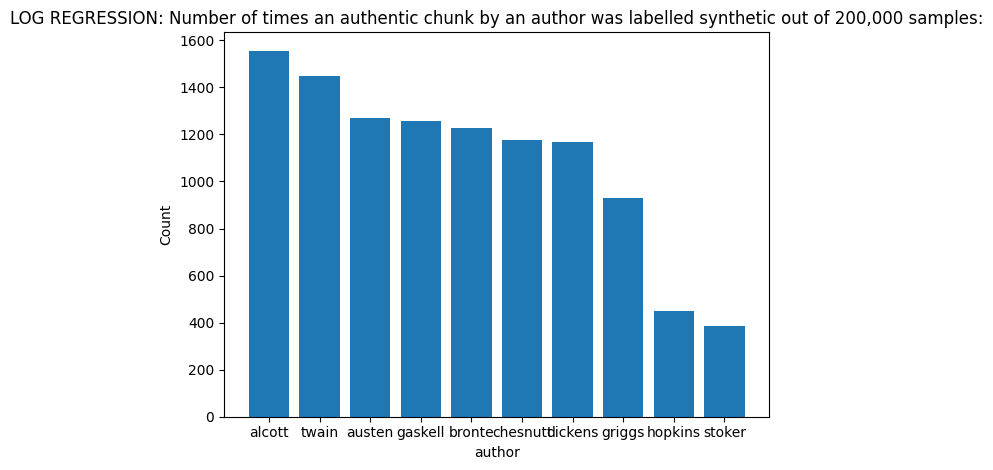

In [70]:
plt.figure()  # Adjust the figure size if necessary
plt.bar(auth_df['author'], auth_df['Count'])

# Step 2: Labeling the graph
plt.xlabel('author')
plt.ylabel('Count')
plt.title('LOG REGRESSION: Number of times an authentic chunk by an author was labelled synthetic out of 200,000 samples:')

# Step 3: Show the plot
plt.tight_layout()
plt.show()


In [71]:
synthetic = df['synthetic_mislabeled'].tolist()

synthetic_mislabeled = []

import ast

# Iterate over each string in the list
for item in synthetic:
    # Convert the string representation of the list into an actual list using ast.literal_eval
    sublist = ast.literal_eval(item)
    # Extend the flat_list with elements from the sublist
    synthetic_mislabeled.extend(sublist)

author_mislabeled_syn = []

for x in synthetic_mislabeled:
    name = x.split("_")[0]
    author_mislabeled_syn.append(name.lower())

string_counts_syn = Counter(author_mislabeled_syn)

# Create a DataFrame from the Counter dictionary
auth_df_syn = pd.DataFrame(list(string_counts_syn.items()), columns=['author', 'Count'])
auth_df_syn = auth_df_syn.sort_values("Count", ascending=False)

print("Number of times an synthetic chunk by GPT mimicking an author was labelled authentic out of 10,000 samples (2000 samples by 100 runs):")

auth_df_syn.head(10)

Number of times an synthetic chunk by GPT mimicking an author was labelled authentic out of 10,000 samples (2000 samples by 100 runs):


,author,Count
3,twain,1397
0,austen,964
4,alcott,579
1,bronte,379
6,griggs,353
2,hopkins,244
5,dickens,137
7,gaskell,130
8,stoker,6


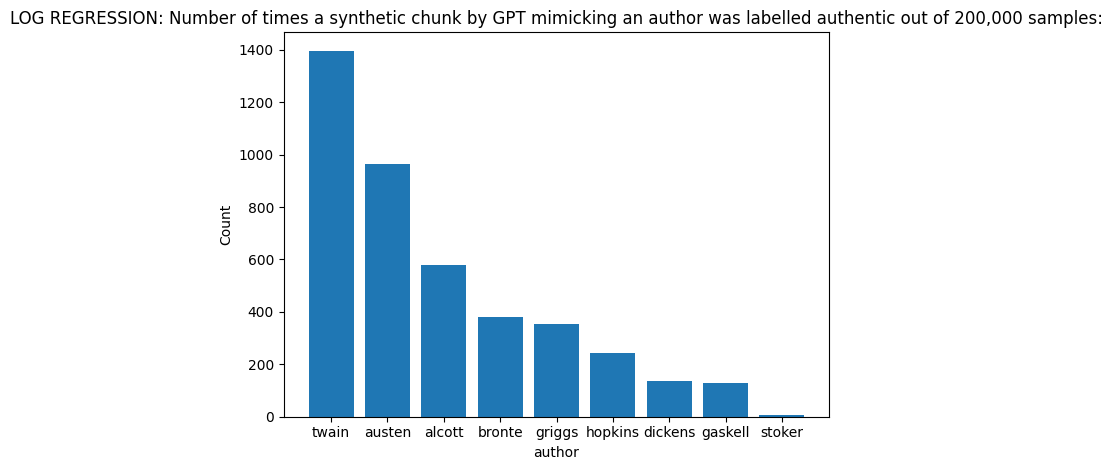

In [72]:
plt.figure()  # Adjust the figure size if necessary
plt.bar(auth_df_syn['author'], auth_df_syn['Count'])

# Step 2: Labeling the graph
plt.xlabel('author')
plt.ylabel('Count')
plt.title('LOG REGRESSION: Number of times a synthetic chunk by GPT mimicking an author was labelled authentic out of 200,000 samples:')

# Step 3: Show the plot
plt.tight_layout()
plt.show()

In [73]:
dict_list = []

# Loop through the column, and check if the row is a dictionary or a string
for index, row in df['top_10_features'].items():
    if isinstance(row, str):
        # Convert the string to a dictionary
        row_dict = ast.literal_eval(row)
    elif isinstance(row, dict):
        # If it's already a dictionary, use it directly
        row_dict = row
    else:
        # Skip if the row is neither a string nor a dictionary
        print(f"Row {index} is not a valid type, skipping.")
        continue
    
    # Append the dictionary to the list
    dict_list.append(row_dict)

all_keys = []

# Loop through each dictionary and extract the keys
for d in dict_list:
    all_keys.extend(d.keys())

# Use Counter to count the occurrences of each key
key_counts = Counter(all_keys)

# Convert the Counter dictionary to a DataFrame
feature_keys_df = pd.DataFrame(list(key_counts.items()), columns=['Key', 'Count'])

feature_keys_df.sort_values("Count", ascending=False)

,Key,Count
0,the,102
1,of,102
2,a,102
3,to,102
4,i,102
5,he,101
6,male_pronouns,101
7,it,93
8,was,86
9,in,56


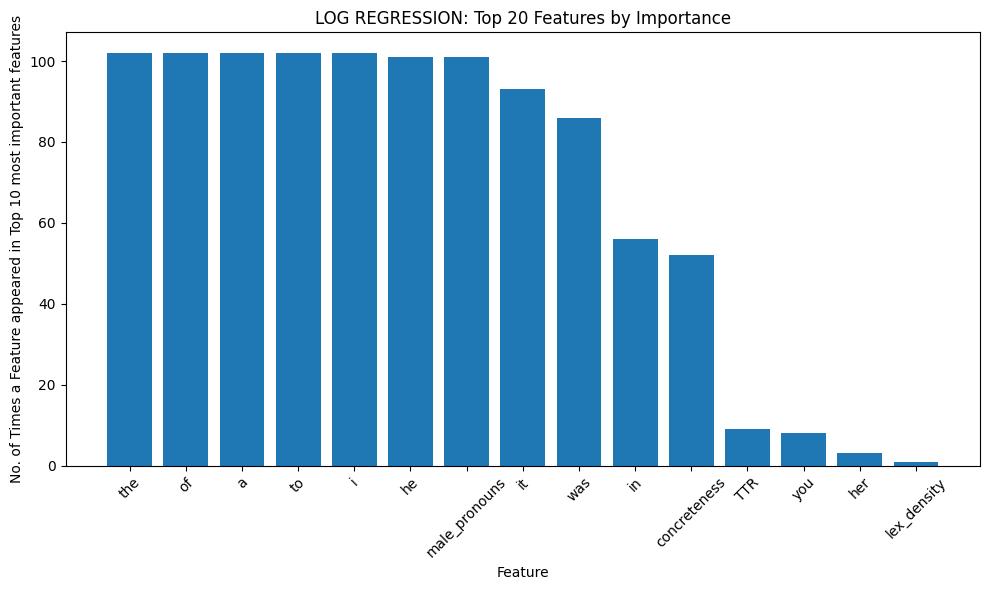

<Figure size 640x480 with 0 Axes>

In [74]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and you want the top 10 rows based on a 'Count' column
top_features_df = feature_keys_df.nlargest(20, 'Count')  # Adjust 'Count' to the column you want to sort by

# Plot a bar chart
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.bar(top_features_df['Key'], top_features_df['Count'])  # Use appropriate column names

# Labeling the graph
plt.xlabel('Feature')
plt.ylabel('No. of Times a Feature appeared in Top 10 most important features')
plt.title('LOG REGRESSION: Top 20 Features by Importance')

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45)

# Display the bar chart
plt.tight_layout()
plt.show()

plt.savefig('top_features.png', dpi=300)  # Save as PNG with 300 DPI

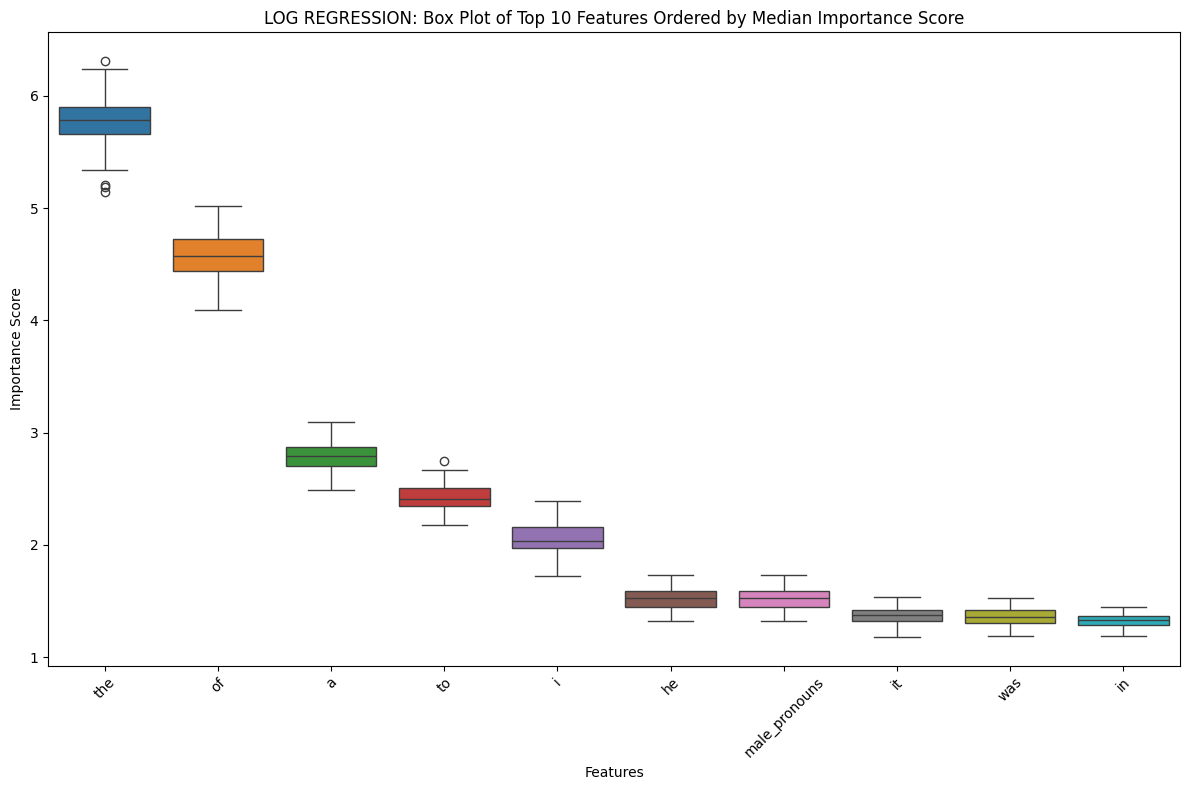

In [75]:
import seaborn as sns

# Step 2: Get the top 20 keys based on their occurrence
top_10_keys = [k for k, v in key_counts.most_common(10)]

# Step 3: Create a dictionary to store values associated with each key
key_values = {key: [] for key in top_10_keys}

# Step 4: Collect values for each key across all dictionaries
for d in dict_list:
    for key in top_10_keys:
        if key in d:
            key_values[key].append(d[key])

positive_dict = {key: [abs(num) for num in value] for key, value in key_values.items()}


# Step 5: Convert key-values dictionary into a DataFrame for plotting
data = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in positive_dict.items()]))

medians = data.median().sort_values(ascending=False)
data = data[medians.index]  # Reorder DataFrame columns based on sorted medians

# Step 7: Create a box plot for the top 20 keys ordered by median
plt.figure(figsize=(12, 8))  # Adjust the figure size if necessary
sns.boxplot(data=data)

# Add labels and title
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('LOG REGRESSION: Box Plot of Top 10 Features Ordered by Median Importance Score')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the box plot
plt.tight_layout()
plt.show()


In [76]:
type(key_values)

dict

## Positive co-efficients: Associated with AUTHENTIC text

In [77]:
dict_list = []

# Loop through the column, and check if the row is a dictionary or a string
for index, row in df['top_10_pos_features'].items():
    if isinstance(row, str):
        # Convert the string to a dictionary
        row_dict = ast.literal_eval(row)
    elif isinstance(row, dict):
        # If it's already a dictionary, use it directly
        row_dict = row
    else:
        # Skip if the row is neither a string nor a dictionary
        print(f"Row {index} is not a valid type, skipping.")
        continue
    
    # Append the dictionary to the list
    dict_list.append(row_dict)

all_keys = []

# Loop through each dictionary and extract the keys
for d in dict_list:
    all_keys.extend(d.keys())

# Use Counter to count the occurrences of each key
key_counts = Counter(all_keys)

# Convert the Counter dictionary to a DataFrame
feature_keys_df = pd.DataFrame(list(key_counts.items()), columns=['Key', 'Count'])

feature_keys_df.sort_values("Count", ascending=False)

,Key,Count
0,the,53
1,of,53
2,a,53
3,in,53
7,with,53
8,her,53
5,concreteness,52
10,to,49
13,male_pronouns,49
12,he,49


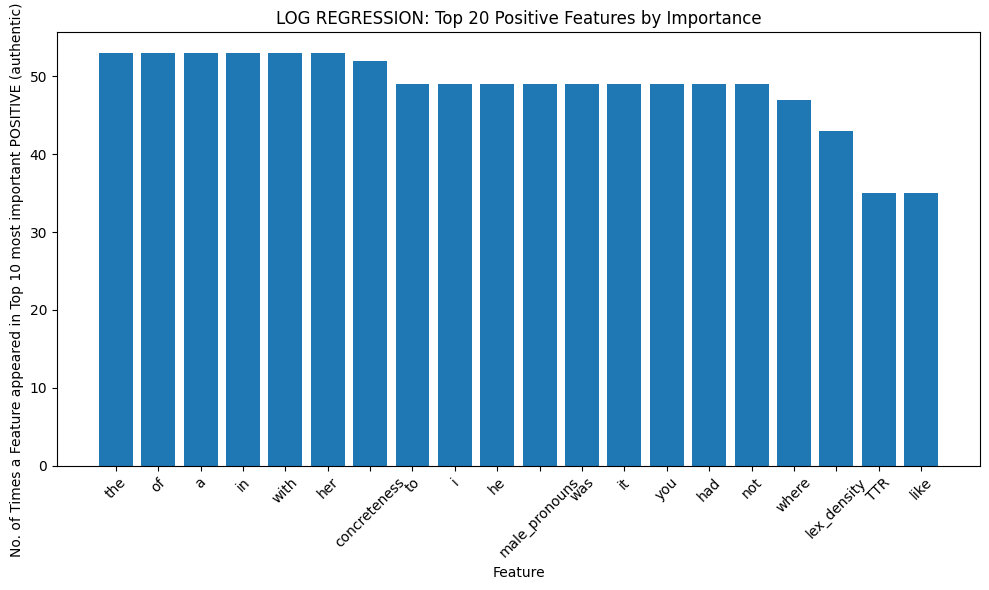

<Figure size 640x480 with 0 Axes>

In [78]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and you want the top 10 rows based on a 'Count' column
top_features_df = feature_keys_df.nlargest(20, 'Count')  # Adjust 'Count' to the column you want to sort by

# Plot a bar chart
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.bar(top_features_df['Key'], top_features_df['Count'])  # Use appropriate column names

# Labeling the graph
plt.xlabel('Feature')
plt.ylabel('No. of Times a Feature appeared in Top 10 most important POSITIVE (authentic) features')
plt.title('LOG REGRESSION: Top 20 Positive Features by Importance')

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45)

# Display the bar chart
plt.tight_layout()
plt.show()

plt.savefig('top_features.png', dpi=300)  # Save as PNG with 300 DPI

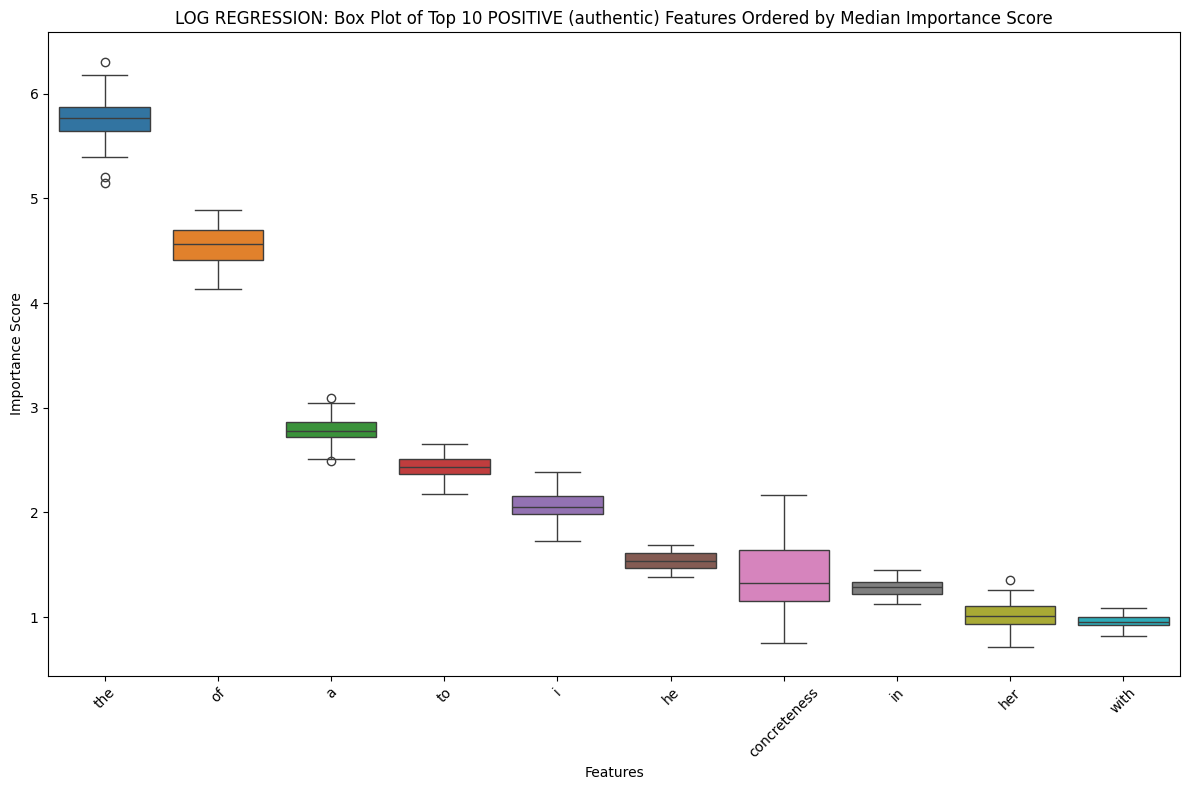

In [79]:
import seaborn as sns

# Step 2: Get the top 20 keys based on their occurrence
top_10_keys = [k for k, v in key_counts.most_common(10)]

# Step 3: Create a dictionary to store values associated with each key
key_values = {key: [] for key in top_10_keys}

# Step 4: Collect values for each key across all dictionaries
for d in dict_list:
    for key in top_10_keys:
        if key in d:
            key_values[key].append(d[key])

# Step 5: Convert key-values dictionary into a DataFrame for plotting
data = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in key_values.items()]))

medians = data.median().sort_values(ascending=False)
data = data[medians.index]  # Reorder DataFrame columns based on sorted medians

# Step 7: Create a box plot for the top 20 keys ordered by median
plt.figure(figsize=(12, 8))  # Adjust the figure size if necessary
sns.boxplot(data=data)

# Add labels and title
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('LOG REGRESSION: Box Plot of Top 10 POSITIVE (authentic) Features Ordered by Median Importance Score')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the box plot
plt.tight_layout()
plt.show()



## Negative Co-efficients: Associated with SYNTHETIC text

In [80]:
dict_list = []

# Loop through the column, and check if the row is a dictionary or a string
for index, row in df['top_10_neg_features'].items():
    if isinstance(row, str):
        # Convert the string to a dictionary
        row_dict = ast.literal_eval(row)
    elif isinstance(row, dict):
        # If it's already a dictionary, use it directly
        row_dict = row
    else:
        # Skip if the row is neither a string nor a dictionary
        print(f"Row {index} is not a valid type, skipping.")
        continue
    
    # Append the dictionary to the list
    dict_list.append(row_dict)

all_keys = []

# Loop through each dictionary and extract the keys
for d in dict_list:
    all_keys.extend(d.keys())

# Use Counter to count the occurrences of each key
key_counts = Counter(all_keys)

# Convert the Counter dictionary to a DataFrame
feature_keys_df = pd.DataFrame(list(key_counts.items()), columns=['Key', 'Count'])

feature_keys_df.sort_values("Count", ascending=False)

,Key,Count
0,to,53
1,i,53
2,he,53
3,male_pronouns,53
4,it,53
5,was,53
6,had,53
7,you,53
8,not,53
10,the,49


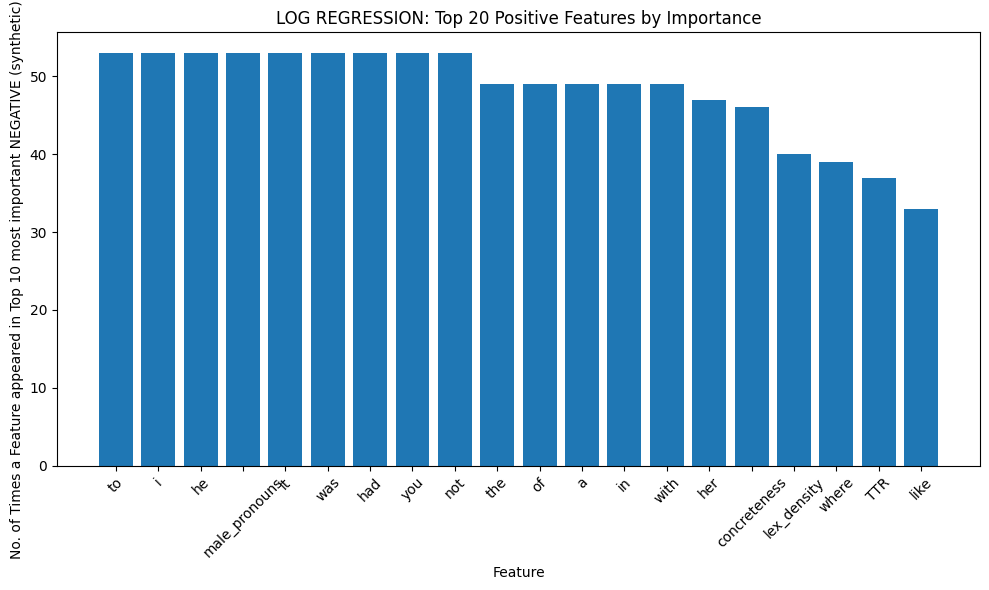

In [81]:

# Assuming df is your DataFrame and you want the top 10 rows based on a 'Count' column
top_features_df = feature_keys_df.nlargest(20, 'Count')  # Adjust 'Count' to the column you want to sort by

# Plot a bar chart
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.bar(top_features_df['Key'], top_features_df['Count'])  # Use appropriate column names

# Labeling the graph
plt.xlabel('Feature')
plt.ylabel('No. of Times a Feature appeared in Top 10 most important NEGATIVE (synthetic) features')
plt.title('LOG REGRESSION: Top 20 Positive Features by Importance')

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45)

# Display the bar chart
plt.tight_layout()
plt.show()


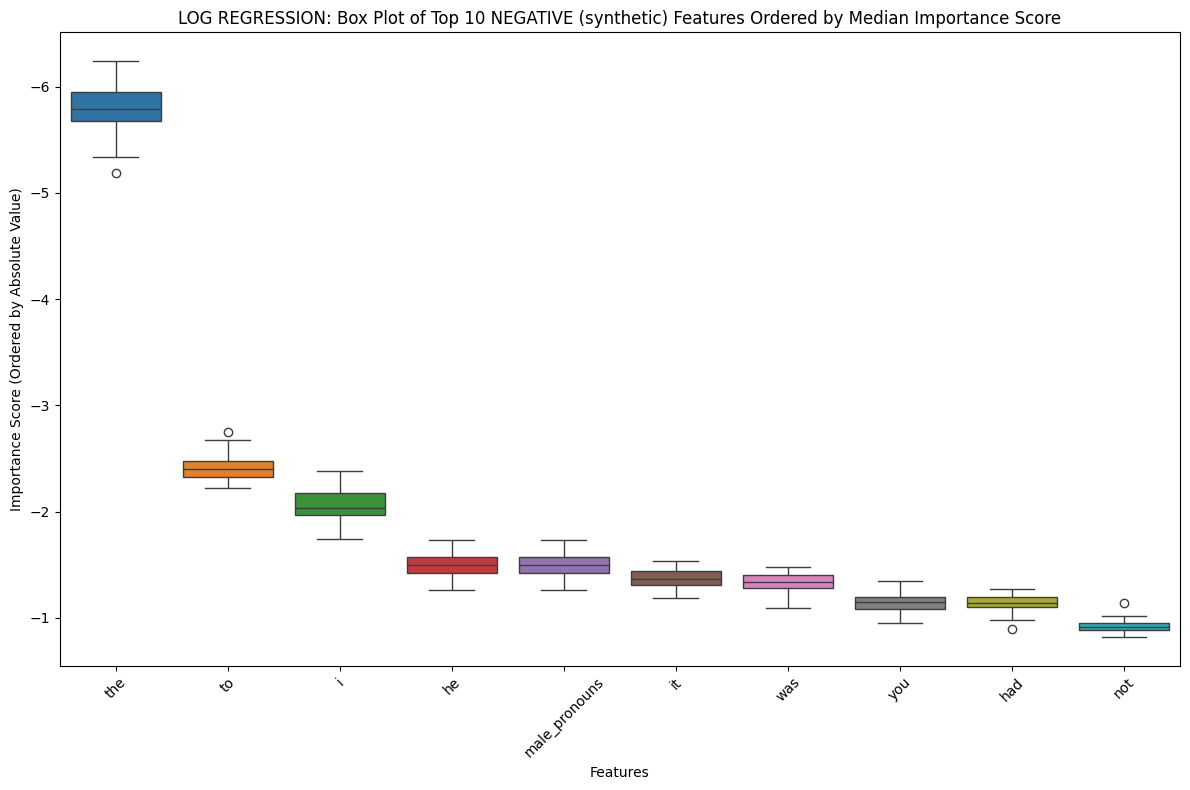

In [83]:
import seaborn as sns

# Step 2: Get the top 20 keys based on their occurrence
top_10_keys = [k for k, v in key_counts.most_common(10)]

# Step 3: Create a dictionary to store values associated with each key
key_values = {key: [] for key in top_10_keys}

# Step 4: Collect values for each key across all dictionaries
for d in dict_list:
    for key in top_10_keys:
        if key in d:
            key_values[key].append(d[key])

# Step 5: Convert key-values dictionary into a DataFrame for plotting
data = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in key_values.items()]))

medians = data.median().sort_values(ascending=True)
data = data[medians.index]  # Reorder DataFrame columns based on sorted medians

# Step 7: Create a box plot for the top 20 keys ordered by median
plt.figure(figsize=(12, 8))  # Adjust the figure size if necessary
sns.boxplot(data=data)



# Add labels and title
plt.xlabel('Features')
plt.ylabel('Importance Score (Ordered by Absolute Value)')
plt.title('LOG REGRESSION: Box Plot of Top 10 NEGATIVE (synthetic) Features Ordered by Median Importance Score')

plt.gca().invert_yaxis()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the box plot
plt.tight_layout()
plt.show()
